In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<10]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 17
num_cols = 2
num_but_cat = 1
cat_but_car= 2


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)
for i in cat_cols :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']
SeniorCitizen  :  [0 1]  =  [0 1]


In [4]:
df["Churn"] = df["Churn"].replace({"No":0,"Yes":1})

In [5]:
columns_to_replace = [
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "OnlineSecurity"
]
for col in columns_to_replace:
    df[col] = df[col].replace({
        'No internet service': 'No',
        'Yes': 1
    }).replace({
        'No': 0
    })

In [6]:
df["OnlineSecurity"].unique()

array([0, 1], dtype=int64)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df.copy(deep = True)
for i in cat_cols :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]  =  [0 1]
OnlineBackup  :  [1 0]  =  [1 0]
DeviceProtection  :  [0 1]  =  [0 1]
TechSupport  :  [0 1]  =  [0 1]
StreamingTV  :  [0 1]  =  [0 1]
StreamingMovies  :  [0 1]  =  [0 1]
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  [0 1]
SeniorCitizen  :  [0 1]  =  [0 1]


In [8]:
df[columns_to_replace]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,OnlineSecurity
0,1,0,0,0,0,0
1,0,1,0,0,0,1
2,1,0,0,0,0,1
3,0,1,1,0,0,1
4,0,0,0,0,0,0
...,...,...,...,...,...,...
7038,0,1,1,1,1,1
7039,1,1,0,1,1,0
7040,0,0,0,0,0,1
7041,0,0,0,0,0,0


In [9]:
df[columns_to_replace].sum(axis=1)

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Length: 7043, dtype: int64

In [10]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [11]:
df['TotalCharges'].apply(lambda x: len(x.split())).value_counts()

TotalCharges
1    7032
0      11
Name: count, dtype: int64

In [12]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan).astype(float)

In [13]:
df["TotalCharges"]=df["TotalCharges"].fillna(df.groupby(["InternetService","Contract"])["TotalCharges"].transform("mean"))

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [16]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
df.loc[(df["Partner"]=="No") & (df["Dependents"]=="No"),"is_alone"] = 1
df["is_alone"] = df["is_alone"].fillna(0)


df.loc[(df["Partner"]=="Yes") & (df["Dependents"]=="Yes"),"family"] = 3
df.loc[(df["Partner"]=="Yes") & (df["Dependents"]=="No"),"family"] = 2
df.loc[(df["Partner"]=="No") & (df["Dependents"]=="Yes"),"family"] = 1
df["family"] = df["family"].fillna(0)

df["MonthlyToTotalRatio"] = df["MonthlyCharges"] / df["TotalCharges"]
df["AverageCharge"] = df["tenure"] / df["TotalCharges"]
df.loc[(df["PaymentMethod"]=='Bank transfer (automatic)') | (df["PaymentMethod"]=='Credit card (automatic)'),"IsAutoPayment"] =1
df["IsAutoPayment"] = df["IsAutoPayment"].fillna(0)
df["TotalServices"] = df[columns_to_replace].sum(axis=1)

df["online"] = df[["OnlineBackup","OnlineSecurity"]].sum(axis=1)

df["InternetService"]  =df["InternetService"].replace({'Fiber optic':2,'DSL':1,'No':0}) 

In [18]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<10]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 22
num_cols = 5
num_but_cat = 14
cat_but_car= 1


In [19]:
from feature_engine.encoding import OneHotEncoder
ohe  = OneHotEncoder(variables="InternetService",drop_last=True)

In [20]:
def ohe(df,ohe_cols):
    df = pd.get_dummies(df,columns=ohe_cols,drop_first=True,dtype=int)
    return df

In [21]:
df.drop("customerID",axis=1,inplace=True)

In [22]:
ohe_cols=[col for col in df.columns if not np.issubdtype(df[col],np.number) and col!="Churn"]
df[ohe_cols]

,gender,Partner,Dependents,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,One year,No,Mailed check
2,Male,No,No,Yes,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Month-to-month,Yes,Mailed check


In [23]:
def rare_analysis(df,target,cat_cols):
    for col in cat_cols:
        print(col,":",len(df[col].value_counts()))
        df_ratio = (df[col].value_counts() /len(df)).sort_values(ascending=False)
        df_count = df[col].value_counts().loc[df_ratio.index]
        df_target_mean = df.groupby(col)[target].mean().loc[df_ratio.index]
        print(pd.DataFrame({"Ratio": df_ratio,
              "Count": df_count,
              "Target_Mean": df_target_mean}))
        print("-------------------------------------------------------")
        
rare_analysis(df,"Churn",ohe_cols)

gender : 2
           Ratio  Count  Target_Mean
gender                              
Male    0.504756   3555     0.261603
Female  0.495244   3488     0.269209
-------------------------------------------------------
Partner : 2
            Ratio  Count  Target_Mean
Partner                              
No       0.516967   3641     0.329580
Yes      0.483033   3402     0.196649
-------------------------------------------------------
Dependents : 2
               Ratio  Count  Target_Mean
Dependents                              
No          0.700412   4933     0.312791
Yes         0.299588   2110     0.154502
-------------------------------------------------------
PhoneService : 2
                 Ratio  Count  Target_Mean
PhoneService                              
Yes           0.903166   6361     0.267096
No            0.096834    682     0.249267
-------------------------------------------------------
MultipleLines : 3
                     Ratio  Count  Target_Mean
MultipleLines       

In [24]:
df2 = ohe(df,ohe_cols)

In [37]:
df2.corr()
X = df2.drop("Churn",axis=1)
y = df2["Churn"]

In [38]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)


# find correlated features

sel.fit(X)
sel.correlated_feature_sets_

[{'TotalCharges', 'tenure'},
 {'AverageCharge', 'InternetService', 'MonthlyCharges'},
 {'OnlineBackup', 'online'},
 {'Partner_Yes', 'family', 'is_alone'},
 {'MultipleLines_No phone service', 'PhoneService_Yes'}]

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection,DropCorrelatedFeatures
from lightgbm import LGBMClassifier
lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=3, verbose=-1,learning_rate= 0.01,n_estimators = 1000)

smart = SmartCorrelatedSelection(
    variables=None,
    method="spearman",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=lgbmc_3,
    scoring="recall",
    cv=10
)

smart.fit(X,y)

In [42]:
X=smart.transform(X)

In [43]:
from feature_engine.selection import DropCorrelatedFeatures
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)


# find correlated features

sel.fit(X)
sel.correlated_feature_sets_

[]

In [44]:
X.columns = [col.replace(' ', '_') for col in X.columns]

In [116]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,precision_score
accuracy= []
recall =[]
roc_auc= []
precision = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20,stratify=y)

lgbmc_3=LGBMClassifier(random_state=0,scale_pos_weight=3, verbose=0,learning_rate= 0.01,n_estimators = 1000)

lgbmc_3.fit(X_train, y_train,eval_set=(X_test, y_test))

y_pred = lgbmc_3.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['LightGBM_adjusted_weight_3']
result_df8 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df8

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


,Accuracy,Recall,Roc_Auc,Precision
LightGBM_adjusted_weight_3,0.7597,0.7571,0.7589,0.5327


In [117]:
y_train.value_counts()

Churn
0    4397
1    1589
Name: count, dtype: int64

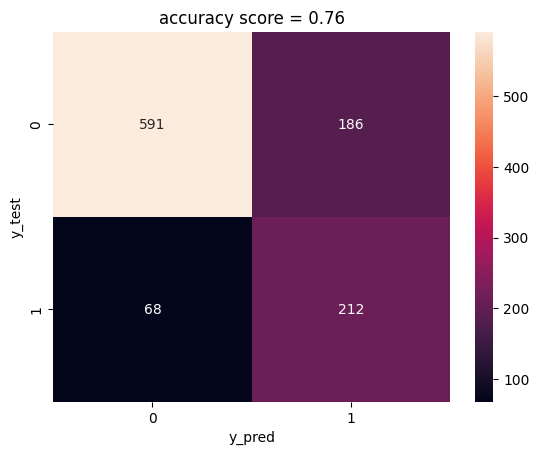

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification_report,RocCurveDisplay
def plot_confusion_matrix(y_test,y_pred):
    acc = round(accuracy_score(y_test,y_pred),2)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title(f"accuracy score = {acc}")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


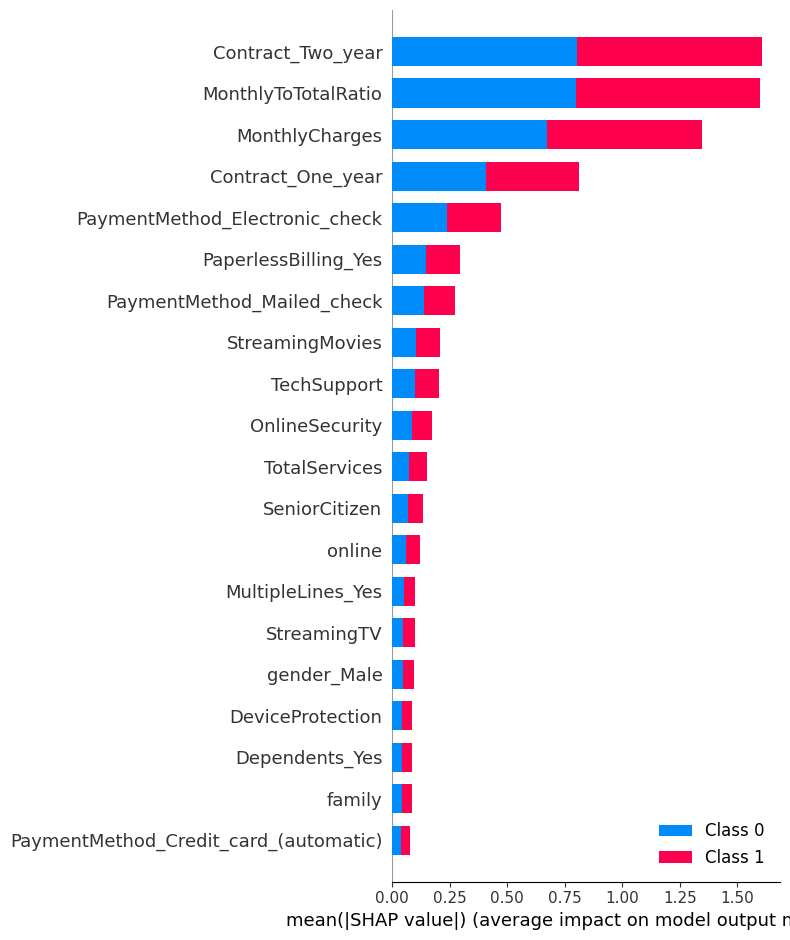

In [119]:
import shap 
explainerlgbmc = shap.TreeExplainer(lgbmc_3)
shap_values_LightGBM_test = explainerlgbmc.shap_values(X_test)
shap_values_LightGBM_train = explainerlgbmc.shap_values(X_train)
shap.summary_plot(shap_values_LightGBM_train, X_train, plot_type="bar")

In [120]:
from xgboost import XGBClassifier
accuracy= []
recall =[]
roc_auc= []
precision = []

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000,scale_pos_weight=3)
classifier_xgb.fit(X_train, y_train)
y_pred = classifier_xgb.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))
model_names = ['XGBoost_adjusted_weight_3']
result_df6 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df6

,Accuracy,Recall,Roc_Auc,Precision
XGBoost_adjusted_weight_3,0.7455,0.8071,0.7652,0.5125


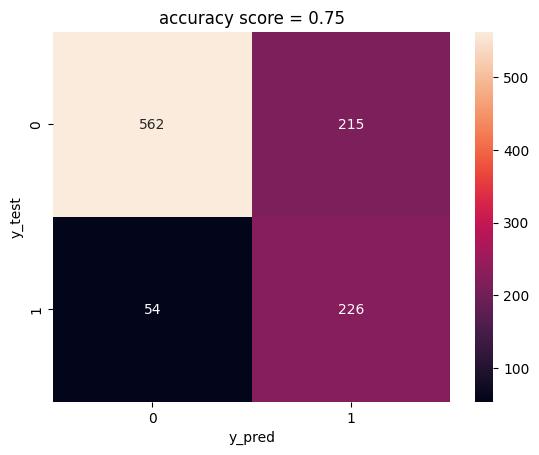

In [121]:
plot_confusion_matrix(y_test,y_pred)

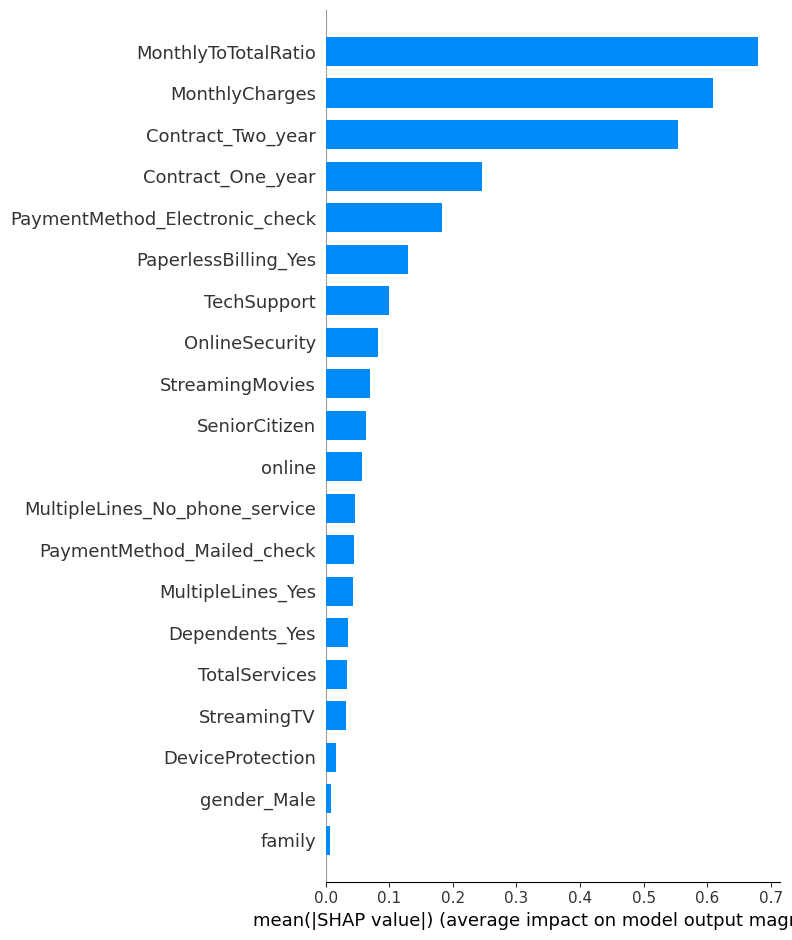

In [124]:
explainerxgb = shap.TreeExplainer(classifier_xgb)
shap_values_xgb_test = explainerxgb.shap_values(X_test)
shap_values_xgb_train = explainerxgb.shap_values(X_train)
shap.summary_plot(shap_values_xgb_train, X_train, plot_type="bar")

In [125]:
from catboost import CatBoostClassifier
accuracy= []
recall =[]
roc_auc= []
precision = []
catboost = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=3,iterations=6000,depth=4)

catboost.fit(X_train, y_train,eval_set=(X_test, y_test))
y_pred = catboost.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['Catboost_adjusted_weight_3']
result_df2 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df2


,Accuracy,Recall,Roc_Auc,Precision
Catboost_adjusted_weight_3,0.7493,0.8143,0.7701,0.517


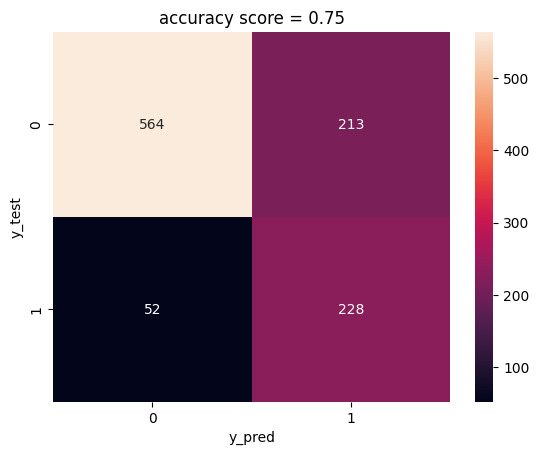

In [126]:
plot_confusion_matrix(y_test,y_pred)

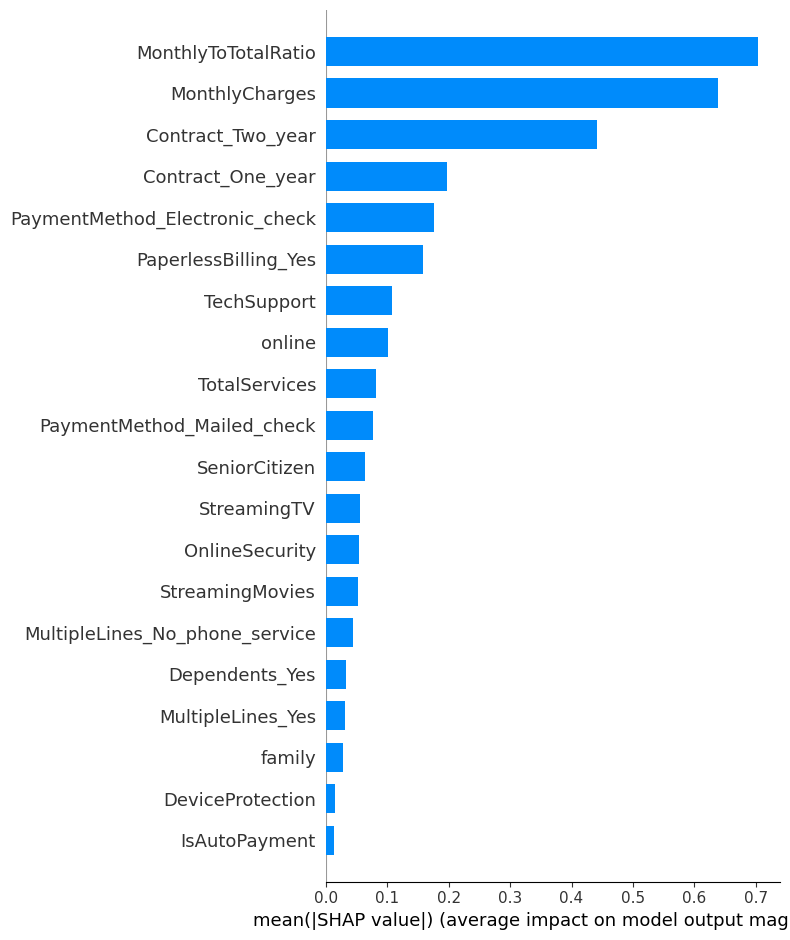

In [127]:
explainerctb = shap.TreeExplainer(catboost)
shap_values_ctb_test = explainerctb.shap_values(X_test)
shap_values_ctb_train = explainerctb.shap_values(X_train)
shap.summary_plot(shap_values_ctb_train, X_train, plot_type="bar")

In [142]:
from catboost import CatBoostClassifier, EShapCalcType, EFeaturesSelectionAlgorithm, Pool


train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)


    
def select_features(algorithm: EFeaturesSelectionAlgorithm, steps: int = 1):
    print('Algorithm:', algorithm)
    model = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=3,iterations=6000,depth=4)
    summary = model.select_features(
        train_pool,
        eval_set=test_pool,
        features_for_select=list(range(train_pool.num_col())),
        num_features_to_select=16,
        steps=steps,
        algorithm=algorithm,
        shap_calc_type=EShapCalcType.Regular,
        train_final_model=True,
        logging_level='Silent',
        plot=True
    )
    print('Selected features:', summary['selected_features_names'])
    return summary

adult_shap_summary = select_features(algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues, steps=5)

Algorithm: EFeaturesSelectionAlgorithm.RecursiveByShapValues


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Selected features: ['SeniorCitizen', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MonthlyCharges', 'MonthlyToTotalRatio', 'TotalServices', 'online', 'gender_Male', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic_check']


In [141]:
y.groupby(X["IsAutoPayment"]).agg(["count","mean"])

,count,mean
IsAutoPayment,,
0.0,3977,0.346744
1.0,3066,0.159817


In [148]:
def feature_selection_with_cv(model, X, y, cv=5, steps=5):
    removed_features = []
    scores = []
    all_features = list(X.columns)
    
    for step in range(steps):
        # Özellik önemlerini al
        feature_importances = get_feature_importance(model, X[all_features], y)
        
        # Eğer aynı özelliği tekrar seçiyorsa, hatalı bir durum olduğunu bildir ve döngüden çık
        least_important_feature = feature_importances.idxmin()
        if least_important_feature in removed_features:
            print(f"Error: Feature '{least_important_feature}' was selected again. Breaking the loop.")
            break
        
        all_features.remove(least_important_feature)
        
        # Kaldırılan özelliği listeye ekle
        removed_features.append(least_important_feature)
        
        # Modeli cross-validation ile eğit
        cv_scores = cross_val_score(model, X[all_features], y, cv=cv)
        
        # Ortalama skoru kaydet
        scores.append(cv_scores.mean())
        
        print(f"Step {step+1}, Removed: {least_important_feature}, CV Score: {scores[-1]}")
    
    results_df = pd.DataFrame({
        'Removed_Feature': removed_features,
        'CV_Score': scores
    })
    
    return results_df



model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3, iterations=600, depth=4)
results = feature_selection_with_cv(model, X_train, y_train, cv=10, steps=10)
print(results)


Step 1, Removed: IsAutoPayment, CV Score: 0.7469020273476976
Step 2, Removed: StreamingTV, CV Score: 0.7485717556015878
Step 3, Removed: MultipleLines_Yes, CV Score: 0.7482381449573146
Step 4, Removed: StreamingMovies, CV Score: 0.7482370282689654
Step 5, Removed: Dependents_Yes, CV Score: 0.7499081523832921
Step 6, Removed: DeviceProtection, CV Score: 0.7477350768560755
Step 7, Removed: SeniorCitizen, CV Score: 0.7499064773507685
Step 8, Removed: PaymentMethod_Credit_card_(automatic), CV Score: 0.7480678499840872
Step 9, Removed: OnlineSecurity, CV Score: 0.7489048079016867
Step 10, Removed: gender_Male, CV Score: 0.7469000731430868
                         Removed_Feature  CV_Score
0                          IsAutoPayment  0.746902
1                            StreamingTV  0.748572
2                      MultipleLines_Yes  0.748238
3                        StreamingMovies  0.748237
4                         Dependents_Yes  0.749908
5                       DeviceProtection  0.747735
6

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from catboost import CatBoostClassifier

# Modeli tanımlayın
model = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=3, iterations=600, depth=4)

# Ardışık özellik seçimini tanımlayın
sfs = SFS(model, 
          k_features=16, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=10)

# SFS'yi eğitim verisiyle uygulayın
sfs = sfs.fit(X_train, y_train)

# Seçilen özellikleri gösterin
print('Selected features:', sfs.k_feature_names_)

# Özelliklerin performansını bir DataFrame'de gösterin
df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
print(df_sfs[['feature_names', 'avg_score']])


In [150]:
cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(X)

cat_cols = 20
num_cols = 2
num_but_cat = 20
cat_but_car= 0


In [158]:
X["gender_Male"]

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender_Male, Length: 7043, dtype: int32

In [162]:
import numpy as np
from scipy.stats import chi2_contingency
chi2_results = {'Feature': [], 'Chi2 Score': [], 'P-Value': []}

# Her bir kategorik kolon için chi2 testini uygulama
for col in cat_cols:
    contingency = pd.crosstab(X[col], y)
    chi2, p, _, _ = chi2_contingency(contingency)
    
    chi2_results['Feature'].append(col)
    chi2_results['Chi2 Score'].append(chi2)
    chi2_results['P-Value'].append(p)

# Sonuçları bir DataFrame'e dönüştürme
results_df = pd.DataFrame(chi2_results)
results_df = results_df.sort_values("P-Value",ascending=False)
results_df

,Feature,Chi2 Score,P-Value
10,gender_Male,0.484083,4.865787e-01
12,MultipleLines_No_phone_service,0.915033,3.387825e-01
13,MultipleLines_Yes,11.143251,8.433795e-04
5,StreamingMovies,26.251336,2.997474e-07
4,StreamingTV,27.862522,1.302484e-07
2,DeviceProtection,30.513395,3.315693e-08
19,PaymentMethod_Mailed_check,58.708410,1.828582e-14
17,PaymentMethod_Credit_card_(automatic),126.296354,2.648297e-29
0,SeniorCitizen,159.426300,1.510067e-36
9,online,193.244061,1.090398e-42


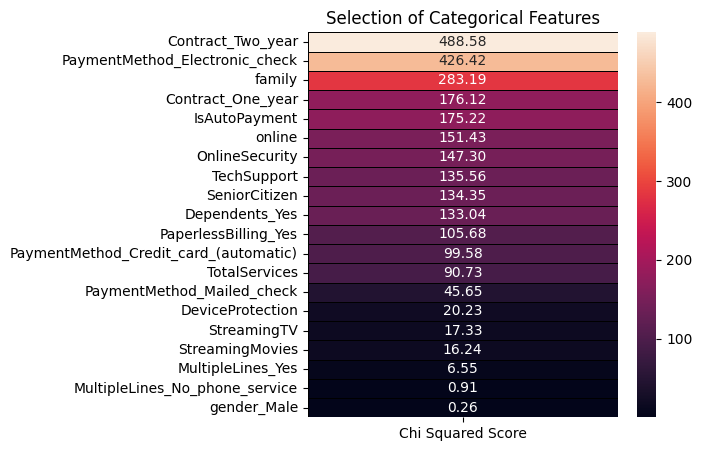

In [178]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(X[cat_cols],y)

featureScores = pd.DataFrame(data = fit.scores_,index = cat_cols,columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

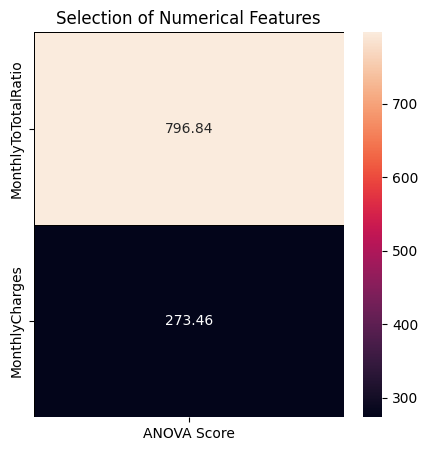

In [179]:
from sklearn.feature_selection import f_classif
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(X[num_cols],y)

featureScores = pd.DataFrame(data = fit.scores_,index = num_cols,columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

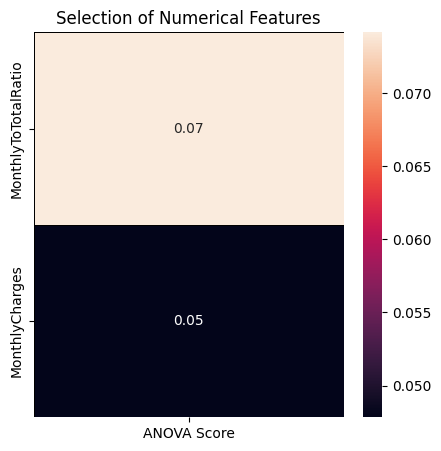

In [180]:
from sklearn.feature_selection import f_classif
best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(X[num_cols],y)

featureScores = pd.DataFrame(data = fit.scores_,index = num_cols,columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [169]:
import pandas as pd
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif_scores = []
mutual_info_scores = []

f_classif_scores = []
p_values = []
mutual_info_scores = []

for column in num_cols:
    X_temp = X[[column]]
    
    f_score, p_value = f_classif(X_temp, y)
    mi_score = mutual_info_classif(X_temp, y)
    
    f_classif_scores.append(f_score[0])
    p_values.append(p_value[0])
    mutual_info_scores.append(mi_score[0])

f_classif_df = pd.DataFrame({'Feature': num_cols, 'F_classif_score': f_classif_scores, 'P_value': p_values})
mutual_info_df = pd.DataFrame({'Feature': num_cols, 'Mutual_info_score': mutual_info_scores})
f_classif_df

,Feature,F_classif_score,P_value
0,MonthlyCharges,273.463704,2.706646e-60
1,MonthlyToTotalRatio,796.842371,3.563028e-166


In [171]:
mutual_info_df

,Feature,Mutual_info_score
0,MonthlyCharges,0.050278
1,MonthlyToTotalRatio,0.073598


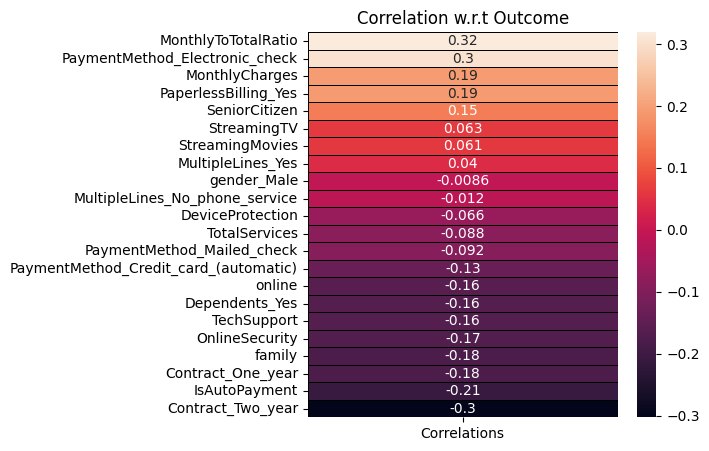

In [173]:
corr = X.corrwith(y).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');